<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script> 
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3.0.1/es5/tex-mml-chtml.js"></script>

# Figures 5, S12, and S13: Immune response to PG fragments.
This code prepares the plots as found in all of Figures 5, S10, and S11. Since these are based on smaller files rather than large mass spec dataframes, all the raw data can be accessed here on Github in the directory "included_small_datasets." 

Additionally, little extra work is required for analysis besides plotting. Code here largely just imports dataframes then plots immediately after short rearrangement. All data were gathered by Zachary A. Kloos and Nicole D. Sonnert. Analysis and code by Joshua W. McCausland.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt, lines, ticker
from pzfx_parser import read_pzfx
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import tukey_hsd, ttest_ind, mannwhitneyu

plt.rcParams["font.family"] = "Arial" #Set global font to arial

CB_color_cycle = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

## Figure 5A: THP-1 response to synthetic PG fragmnets.

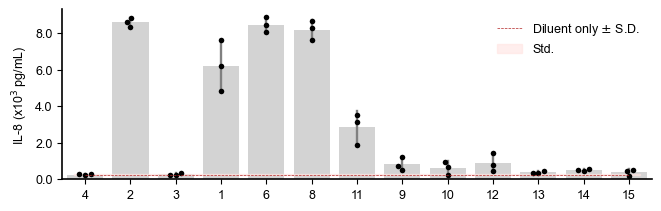

In [2]:
mol = 'IL-8'
pma = 40
# This is to specify the order I wish to plot. I want to be consistent with the NOD2 stimulation assay.
# Also clearly spells out muropeptides for putting in muropeptide schematics later.
ligand_dict = {
    'Ligand 4': 'Diluent Only',
    'Ligand 2': 'NAM-A-Q',
    'Ligand 3': 'MDP-LL',
    'Ligand 1': 'NAM-A-E',
    'Ligand 6': 'NAM-A-E-O',
    'Ligand 8': 'NAM-A-E-O(G)',
    'Ligand 11': 'NAG-NAM-A-E-O(G)',
    'Ligand 9': 'AnhNAM-A-E-O',
    'Ligand 10': 'AnhNAM-A-E-O(G)',
    'Ligand 12': 'NAG-AnhNAM-A-E-O(G)',
    'Ligand 13': 'A-E-O',
    'Ligand 14': 'A-E-O(G)',
    'Ligand 15': 'A-E-O(G)-A-A'}

def y_fmt(x, y):
    return f'{(x/1e3):<2.1f}'.format(x).split('e')[0]

cdk_df = pd.read_excel(f'included_small_datasets/Dec-16-2022-Human-Focused-15-Plex-Kloos-45265-Tissue-Cell-Cullture.xlsx', sheet_name='data_reorganized')
cdk_df= cdk_df[cdk_df.PMA == f'{pma} nM PMA'].drop(['PMA'],axis=1)
cdk_df = cdk_df[cdk_df.Ligand.isin(list(ligand_dict.keys()))]
cdk_df = cdk_df[['Ligand',mol]]
cdk_df['Ligand'] = cdk_df.Ligand.apply(lambda row: int(row.split()[1]))
cdk_df['Replicate'] = np.tile([1,2,3],13)
ligand_order = [int(key.split()[1]) for key in ligand_dict.keys()]
cdk_df = cdk_df.pivot_table(values='IL-8',columns='Ligand',index='Replicate')
cdk_df = cdk_df[ligand_order]

fig,_ax = plt.subplots(figsize = (6.5,2),layout = 'constrained')
sns.barplot(data=cdk_df,color = 'lightgray',errcolor='gray',ax=_ax,errwidth=1.7,order=ligand_order,errorbar='sd')
sns.swarmplot(data=cdk_df,color='black',ax=_ax,size=4,order=ligand_order)
ymean = cdk_df[4].mean()
ystd = cdk_df[4].std()
_ax.plot([0,12],np.repeat(ymean,2),'--',color = 'firebrick',linewidth=0.5,zorder=3,label='Diluent only $\pm$ S.D.')
_ax.fill_between([-0.25,12.25],np.repeat(ymean,2)-ystd,np.repeat(ymean,2)+ystd,color = 'mistyrose',alpha=0.6,zorder=2,label = 'Std.')
_ax.tick_params(axis='both',labelsize=9)
_ax.set_ylabel('Concentration (pg/ml)',fontsize=9)
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.spines[['right','top']].set_visible(False)
_ax.set_xlim([-0.5,12.5])
_ax.legend(loc = 'upper right',frameon = False,fontsize=9)
_ax.set_ylabel(f'IL-8 (x10$^3$ pg/mL)',fontsize=9)
_ax.set_xlabel('',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

## Figure S12A: THP-1 response grouped by synthetic PG fragment identity. 

,Ligand,IL-8,label,ident
0,Ligand 1,6208.206667,reduced,JAE
1,Ligand 10,622.616667,anhydro,UAEOG
2,Ligand 11,2845.693333,reduced,XAEOG
3,Ligand 12,904.716667,anhydro,ZAEOG
4,Ligand 13,376.776667,peptide,AEO
5,Ligand 14,503.260000,peptide,AEOG
6,Ligand 15,390.940000,peptide,AEOGAA
7,Ligand 2,8595.270000,reduced,MDP
8,Ligand 3,276.470000,control,MDP-LL
9,Ligand 4,251.600000,control,Diluent Only


p value from Welch t-test is 0.0049699.


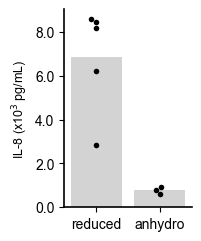

In [8]:
mol = 'IL-8'
pma = 40
ligand_dict = {
    'Ligand 4': 'Diluent Only',
    'Ligand 2': 'MDP',
    'Ligand 3': 'MDP-LL',
    'Ligand 1': 'JAE',
    'Ligand 6': 'JAEO',
    'Ligand 8': 'JAEOG',
    'Ligand 11': 'XAEOG',
    'Ligand 9': 'UAEO',
    'Ligand 10': 'UAEOG',
    'Ligand 12': 'ZAEOG',
    'Ligand 13': 'AEO',
    'Ligand 14': 'AEOG',
    'Ligand 15': 'AEOGAA'}

def y_fmt(x, y):
    return f'{(x/1e3):<2.1f}'.format(x).split('e')[0]


def label_pg(compound):
    compound = int(compound.split(' ')[1])
    label = 'reduced'
    if compound in [3,4]:
        label = 'control'
    elif compound in [9,10,12]:
        label = 'anhydro'
    elif compound in [13,14,15]:
        label = 'peptide'
    return label

cdk_df = pd.read_excel(f'included_small_datasets/Dec-16-2022-Human-Focused-15-Plex-Kloos-45265-Tissue-Cell-Cullture.xlsx', sheet_name='data_reorganized')
cdk_df= cdk_df[cdk_df.PMA == f'{pma} nM PMA'].drop(['PMA'],axis=1)
cdk_df = cdk_df[cdk_df.Ligand.isin(list(ligand_dict.keys()))]
cdk_df = cdk_df[['Ligand',mol]]
cdk_df = cdk_df.groupby('Ligand').mean(numeric_only=True).reset_index()
cdk_df['label'] = cdk_df.Ligand.apply(label_pg)
cdk_df['ident'] = cdk_df.Ligand.apply(lambda x: ligand_dict[x])

display(cdk_df)

fig,_ax = plt.subplots(figsize=[1.9,2.3],layout='constrained')
sns.barplot(data=cdk_df[cdk_df.label != 'peptide'],x='label',y=mol,order=['reduced','anhydro'],color='lightgray',errcolor='gray',ax=_ax,errwidth=1.7,errorbar=None)
sns.swarmplot(data=cdk_df[cdk_df.label != 'peptide'],x='label',y=mol,order=['reduced','anhydro'],color='black',ax=_ax,size=4,legend=False)
_ax.spines[['right','top']].set_visible(False)
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.set_xlabel('')
_ax.set_ylabel(f'IL-8 (x10$^3$ pg/mL)',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
pval = ttest_ind(cdk_df[cdk_df.label == 'reduced']['IL-8'],cdk_df[cdk_df.label == 'anhydro']['IL-8'],equal_var=False)[1]
print(f'p value from Welch t-test is {pval:0.7f}.')

## Figure 5B: Hek-Blue SEAP assay response to synthetic PG fragments.

Text(0.5, 18.167, '')

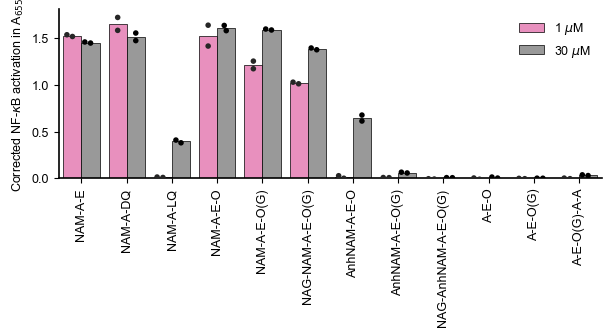

In [10]:
pep_df = pd.read_excel(f'included_small_datasets/Muropeptides_Nod2_Analysis.xlsx',sheet_name='ReorganizedData')
concentrations = [1,30]
ligands_to_plot =[
    'NAM-A-E',
    'NAM-A-DQ',
    'NAM-A-LQ',
    'NAM-A-E-O',
    'NAM-A-E-O(G)',
    'NAG-NAM-A-E-O(G)',
    'AnhNAM-A-E-O',
    'AnhNAM-A-E-O(G)',
    'NAG-AnhNAM-A-E-O(G)',
    'A-E-O',
    'A-E-O(G)',
    'A-E-O(G)-A-A'
]
pep_df = pep_df[(pep_df['compound'].isin(ligands_to_plot)) & (pep_df.concentration.isin(concentrations))]
pep_df['concentration'] = pep_df.concentration.apply(lambda x: f'{x} $\mu$M')

xdata_shift = [-0.2,0.2]
colors = [CB_color_cycle['pink'],CB_color_cycle['gray']]

fig,_ax = plt.subplots(figsize = [6,3.25],layout = 'constrained')
sns.barplot(data=pep_df,x='compound',y='data',hue='concentration',hue_order=['1 $\mu$M','30 $\mu$M'],order=ligands_to_plot,palette=colors,edgecolor='black',linewidth=0.5,errorbar=None)
sns.swarmplot(data=pep_df,x='compound',y='data',hue='concentration',hue_order=['1 $\mu$M','30 $\mu$M'],order=ligands_to_plot,color='black',dodge=True,size=4,legend=False)

_ax.set_ylabel('Corrected NF-$\kappa$B activation in A$_{655}$',fontsize=9)
_ax.spines[['right','top']].set_visible(False)
_ax.spines[['bottom','left']].set_linewidth(1.2)
_ax.set_ylim(bottom = 0)
_ax.tick_params(axis='both',labelsize=9)
_ax.tick_params(axis='x',rotation=90)
_ax.legend(frameon = False,loc = 'upper right',fontsize=9)
_ax.set_xlabel('')

## Figure S13A: SEAP assay grouped by PG fragment identity. 

,compound,concentration,data,label
0,A-E-O,1,-0.003650,peptide
1,A-E-O,30,0.007750,peptide
2,A-E-O(G),1,-0.002600,peptide
3,A-E-O(G),30,0.000700,peptide
4,A-E-O(G)-A-A,1,-0.001150,peptide
5,A-E-O(G)-A-A,30,0.032950,peptide
6,AnhNAM-A-E-O,1,0.013925,anhydro
7,AnhNAM-A-E-O,30,0.644975,anhydro
8,AnhNAM-A-E-O(G),1,0.007375,anhydro
9,AnhNAM-A-E-O(G),30,0.061075,anhydro


p value at 1uM is 0.00058.
p value at 30uM is 0.04223.


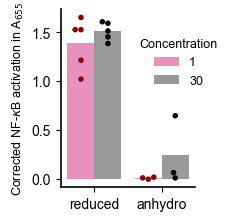

In [11]:
pep_df = pd.read_excel('included_small_datasets/Muropeptides_Nod2_Analysis.xlsx',sheet_name='ReorganizedData')
concentrations = [1,30]
ligand_order =[
    'NAM-A-E',
    'NAM-A-LQ',
    'NAM-A-DQ',
    'NAM-A-E-O',
    'NAM-A-E-O(G)',
    'NAG-NAM-A-E-O(G)',
    'AnhNAM-A-E-O',
    'AnhNAM-A-E-O(G)',
    'NAG-AnhNAM-A-E-O(G)',
    'A-E-O',
    'A-E-O(G)',
    'A-E-O(G)-A-A'
]
pep_df = pep_df[pep_df['compound'].isin(ligand_order) & pep_df.concentration.isin(concentrations)]
def label_pg(compound):
    label = 'reduced'
    if ('NAM-A-LQ' in compound):
        label = 'control'
    elif 'Anh' in compound:
        label = 'anhydro'
    elif 'NAM' not in compound:
        label = 'peptide'
    return label

pep_df = pep_df.groupby(by=['compound','concentration']).mean(numeric_only=True).reset_index().drop('replicate',axis=1)
pep_df['label'] = pep_df.compound.apply(label_pg)
display(pep_df)
colors = [CB_color_cycle['pink'],CB_color_cycle['gray']]
spot_col = ['darkred','black']

fig,_ax = plt.subplots(figsize=[2.2,2.1],layout='constrained')
sns.barplot(data=pep_df[pep_df.label != 'peptide'],x='label',y='data',order=['reduced','anhydro'],color='lightgray',errcolor='gray',ax=_ax,errwidth=1.7,errorbar=None,hue='concentration',palette=colors)
sns.swarmplot(data=pep_df[pep_df.label != 'peptide'],x='label',y='data',order=['reduced','anhydro'],ax=_ax,size=4,hue='concentration',palette=spot_col,dodge=True,legend=False)
_ax.legend(frameon=False,fontsize=9,title='Concentration',title_fontsize=9,bbox_to_anchor = [0.5,0.9])
_ax.spines[['right','top']].set_visible(False)
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.set_xlabel('')
_ax.set_ylabel('Corrected NF-$\kappa$B activation in A$_{655}$',fontsize=9)

comp_1 = ttest_ind(pep_df[(pep_df.label == 'reduced') & (pep_df.concentration == 1)].data,pep_df[(pep_df.label == 'anhydro') & (pep_df.concentration == 1)].data,equal_var=False)[1]*2
comp_30 = ttest_ind(pep_df[(pep_df.label == 'reduced') & (pep_df.concentration == 30)].data,pep_df[(pep_df.label == 'anhydro') & (pep_df.concentration == 30)].data,equal_var=False)[1]*2

print(f'p value at 1uM is {comp_1:.5f}.')
print(f'p value at 30uM is {comp_30:.5f}.')

## Figure S12B: THP-1 cell response to PG fragments, including Glc*N*Ac-AnhMur*N*Ac-L-Ala-D-Glu-L-Orn(Gly)-D-Ala-D-Ala

Text(0.5, 18.166999999999994, '')

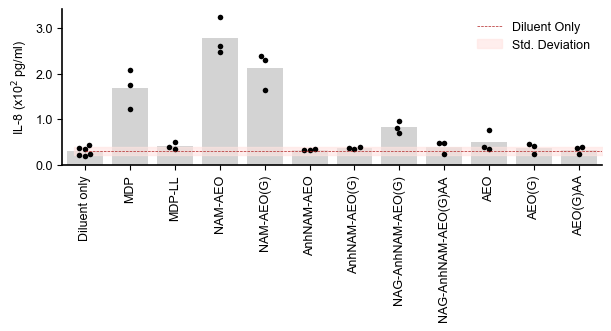

In [14]:
lum_df = pd.read_excel('included_small_datasets/Jan-16-2024-Human-Focused-15-Plex-Discovery-Assay®-Kloos-60784-Tissue-Cell-Culture-Supernatant.xlsx', sheet_name='data_reorganized')
concentration = 30
ligand_order = [
    'Diluent only',
    'MDP',
    'MDP-LL',
    'NAM-AEO',
    'NAM-AEO(G)',
    'AnhNAM-AEO',
    'AnhNAM-AEO(G)',
    'NAG-AnhNAM-AEO(G)',
    'NAG-AnhNAM-AEO(G)AA',
    'AEO',
    'AEO(G)',
    'AEO(G)AA'
]
conc_df = lum_df[(lum_df.concentration == concentration)| (lum_df.id=='Diluent only')]

def y_fmt(x, y):
    return f'{(x/1e2):<2.1f}'.format(x).split('e')[0]

cytokines = lum_df.columns[5:]
mol = 'IL-8'

fig,_ax = plt.subplots(figsize = (6,3.2),layout = 'constrained')
conc_df = conc_df[['id','replicate',mol]]
conc_df = conc_df.pivot_table(values=mol,columns='id',index='replicate')
conc_df = conc_df[ligand_order]

sns.barplot(data=conc_df,color = 'lightgray',errcolor='gray',ax=_ax,errwidth=1.7,errorbar=None)
sns.swarmplot(data=conc_df,color='black',ax=_ax,size=4,order=conc_df)
ymean = conc_df['Diluent only'].mean()
ystd = conc_df['Diluent only'].std()
_ax.plot([0,12],np.repeat(ymean,2),'--',color = 'firebrick',linewidth=0.5,zorder=3,label='Diluent Only')
_ax.fill_between([-0.25,12.25],np.repeat(ymean,2)-ystd,np.repeat(ymean,2)+ystd,color = 'mistyrose',alpha=0.6,zorder=2,label = 'Std. Deviation')
_ax.tick_params(axis='both',labelsize=9)
_ax.set_xlim([-0.5,11.5])
_ax.tick_params(axis='x',rotation=90)

_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.spines[['right','top']].set_visible(False)
_ax.legend(loc = 'upper right',frameon = False,fontsize=9)
_ax.set_ylabel(f'{mol} (x10$^2$ pg/ml)',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

_ax.set_xlabel('',fontsize=9)

## Figure S12C: THP-1 response to synthetic PG fragment identity, including Glc*N*Ac-AnhMur*N*Ac-L-Ala-D-Glu-L-Orn(Gly)-D-Ala-D-Ala

,compound,IL-8,label
0,AEO,49.673333,peptide
1,AEO(G),36.426667,peptide
2,AEO(G)AA,33.076667,peptide
3,AnhNAM-AEO,33.370000,anhydro
4,AnhNAM-AEO(G),36.603333,anhydro
5,Diluent only,29.913333,negativecontrol
6,MDP,168.646667,reduced
7,MDP-LL,41.656667,negativecontrol
8,NAG-AnhNAM-AEO(G),82.636667,anhydro
9,NAG-AnhNAM-AEO(G)AA,39.310000,anhydro


p value is 0.02153


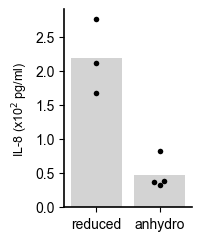

In [15]:
lum_df = pd.read_excel('included_small_datasets/Jan-16-2024-Human-Focused-15-Plex-Discovery-Assay®-Kloos-60784-Tissue-Cell-Culture-Supernatant.xlsx', sheet_name='data_reorganized')
concentration = 30
conc_df = lum_df[(lum_df.concentration == concentration)| (lum_df.id=='Diluent only')]

def y_fmt(x, y):
    return f'{(x/1e2):<2.1f}'.format(x).split('e')[0]

cytokines = lum_df.columns[5:]
mol = 'IL-8'

def label_pg(compound):
    label = 'reduced'
    if ('-LL' in compound) or ('Diluent' in compound):
        label = 'negativecontrol'
    elif 'Anh' in compound:
        label = 'anhydro'
    elif ('NAM' not in compound) and ('MDP' not in compound):
        label = 'peptide'
    return label

conc_df = conc_df[['id',mol]].groupby('id').mean().reset_index().rename(columns={'id': 'compound'})
conc_df['label'] = conc_df.compound.apply(label_pg)
display(conc_df)

fig,_ax = plt.subplots(figsize=[1.9,2.3],layout='constrained')
sns.barplot(data=conc_df[conc_df.label != 'peptide'],x='label',y=mol,order=['reduced','anhydro'],color='lightgray',errcolor='gray',ax=_ax,errwidth=1.7,errorbar=None)
sns.swarmplot(data=conc_df[conc_df.label != 'peptide'],x='label',y=mol,order=['reduced','anhydro'],color='black',ax=_ax,size=4,legend=False)
_ax.spines[['right','top']].set_visible(False)
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.set_xlabel('')
_ax.set_ylabel(f'{mol} (x10$^2$ pg/ml)',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
pval = ttest_ind(conc_df[conc_df.label == 'reduced']['IL-8'],conc_df[conc_df.label == 'anhydro']['IL-8'],equal_var=False)[1]
print(f'p value is {pval:.5f}')

## Figure S12D: MDP dose response curve.

Text(0, 0.5, 'Absorbance (655 nm)')

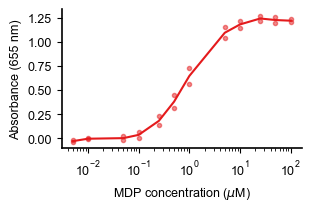

In [20]:
nod2_df = pd.read_csv('included_small_datasets/MDP_dose_response_curve.csv')
fig,ax = plt.subplots(figsize = [3,2],layout='constrained')
nod2_df = nod2_df[nod2_df.condition == 'water']
mean_df = nod2_df.groupby('concentration').mean(numeric_only = True)
ax.plot(nod2_df.concentration,nod2_df.value,'.',alpha = 0.5,color = CB_color_cycle['red'])
ax.plot(mean_df.index,mean_df.value,color = CB_color_cycle['red'],label='water')
ax.set_xscale('log')
ax.spines[['right','top']].set_visible(False)
ax.spines[['left','bottom']].set_linewidth(1.2)
yticks = np.linspace(0,1.25,6)
ax.set_yticks(yticks)
ax.set_xlabel('MDP concentration ($\mu$M)',fontsize=9)
ax.tick_params(axis='both',labelsize = 9)
ax.set_ylabel('Absorbance (655 nm)',fontsize=9)

## Figure S13B: Hek-Blue SEAP assay response to *Borrelia burgdorferi* strain supernatants
The 96 well plate identities are defined in a lab notebook, translated to import raw data, subtract null2 identities, then assign groups/plot.

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.038,0.067,0.046,0.043,0.044,0.063,0.053,0.068,0.067,0.054,0.077,0.032
1,0.067,0.051,0.065,0.048,0.056,0.063,0.059,0.063,0.065,0.062,0.056,0.049
2,0.067,0.045,0.057,0.048,0.059,0.063,0.089,0.077,0.066,0.065,0.057,0.048
3,0.059,0.049,0.060,0.067,0.064,0.074,0.087,0.065,0.064,0.061,0.053,0.093
4,0.078,0.072,0.091,0.068,0.069,0.073,0.068,0.071,0.066,0.062,1.372,0.058
5,0.061,0.063,0.051,0.065,0.065,0.062,0.078,0.075,0.068,0.065,1.435,0.052
6,0.072,0.064,0.073,0.052,0.064,0.074,0.080,0.087,0.082,0.072,0.075,0.062
7,0.058,0.069,0.049,0.059,0.068,0.077,0.076,0.084,0.082,0.075,0.070,0.045


,MDP,BSK,CJW_Bb001,CJW_Bb003,CJW_Bb004,CJW_Bb037,CJW_Bb097,CJW_Bb163,CJW_Bb243,CJW_Bb262,CJW_Bb263,CJW_Bb523
0,1.372,0.062,0.067,0.072,0.065,0.068,0.048,0.043,0.068,0.032,0.045,0.048
1,1.435,0.065,0.051,0.063,0.061,0.065,0.093,0.048,0.063,0.049,0.049,0.067


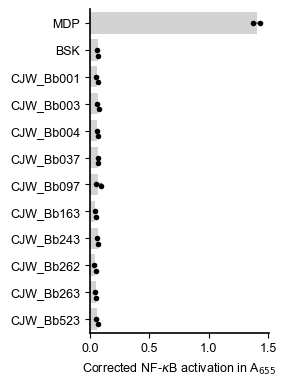

In [17]:
df = pd.read_excel('included_small_datasets/hNod2_cell_reporter_assay_culture_supernatants_04-21-21.xlsx')
nod2 = df.iloc[0:8,1:13].reset_index(drop=True)
null2 = df.iloc[10:18,1:13].reset_index(drop = True)
df = nod2-null2

temp_df = pd.DataFrame({
    'MDP': df[11][4:6].values,
    'BSK': df[10][4:6].values,
    'CJW_Bb001': df[2][0:2].values,
    'CJW_Bb003': df[2][4:6].values,
    'CJW_Bb004': df[10][2:4].values,
    'CJW_Bb037': df[4][4:6].values,
    'CJW_Bb097': df[12][2:4].values,
    'CJW_Bb163': df[4][0:2].values,
    'CJW_Bb243': df[8][0:2].values,
    'CJW_Bb262': df[12][0:2].values,
    'CJW_Bb263': df[2][2:4].values,
    'CJW_Bb523': df[4][2:4].values
})
display(df)
display(temp_df)

fig,_ax = plt.subplots(figsize = [2.75,3.75],layout = 'constrained')
sns.barplot(data=temp_df,ax=_ax,color = 'lightgray',errcolor='gray',errwidth=1.7,orient='h')
sns.swarmplot(data=temp_df,color='black',ax=_ax,size=4,orient='h')
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.spines[['right','top']].set_visible(False)
_ax.set_xlabel('Corrected NF-$\kappa$B activation in A$_{655}$',fontsize=9)
_ax.tick_params(axis='both', labelsize=9)  